In [884]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting

In [885]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

In [886]:
## 读取数据
path = 'd:\\学习资料\\机器学习\\作业\\第二次作业\\regress_data1.csv'
import pandas as pd
data = pd.read_csv(path) ## data 是dataframe 的数据类型
data.head() # 返回data中的前几行数据，默认是前5行。  

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [887]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列， 未标准化
y_data = data.iloc[:,cols-1:]#X是所有行，最后一列

In [888]:
data.describe() ## 查看数据的统计信息

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


看下数据长什么样子，进行画图

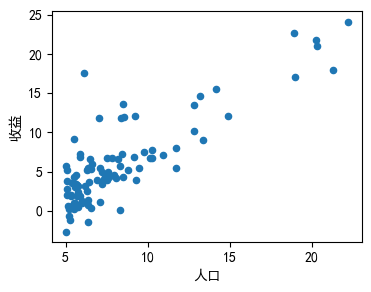

In [889]:
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化代价函数。 

首先，我们将创建一个以参数$w$为特征函数的代价函数
$$J\left( w  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{f}}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{f}}\left( x \right)={{w}^{T}}X={{w }_{0}}{{x}_{0}}+{{w }_{1}}{{x}_{1}}+{{w }_{2}}{{x}_{2}}+...+{{w }_{n}}{{x}_{n}}\\] 
注意：这里所有的样本$x_0$都为1

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [890]:
X_data.insert(0, 'Ones', 1)

从数据中分离出特征属性X和目标向量Y，并对模型参数进行初始化，同时计算当前的损失。

观察下 X (训练集) and y (目标变量)是否正确.

In [891]:
X_data.head()#head()是观察前5行

,Ones,人口
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [892]:
y_data.head()

,收益
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy数组，所以我们需要从dataframeX_data和Y_data中读取数据，然后才能使用它们。
此外，我们还需要初始化w。

In [893]:
X=X_data.values
Y=y_data.values
W=np.array([[0.0],[0.0]]) ## 初始化W系数矩阵，w 是一个(2,1)矩阵

看下维度

In [894]:
(X.shape,Y.shape, W.shape)

((97, 2), (97, 1), (2, 1))

注意***，根据维度，我们写出线性回归的模型：Y=np.dot(X,W) 也就是说  (m,n) @ (n, 1) -> (m, 1),
则线性回归模型写为：$${{f}}\left( X\right)=XW$$
因此，我们定义模型的损失函数为：$$ loss =\frac{(XW-Y)^T(XW-Y)}{2m}$$


In [895]:
def computeCost(X, Y, W):
    Y_hat = np.dot(X,W)
    loss =np.sum((Y_hat - Y)** 2)/(2*X.shape[0])# (m,n) @ (n, 1) -> (n, 1)
    return loss

In [896]:
def computeCost1(X, Y, W):
    Y_hat = X@W
    loss =np.sum((Y_hat - Y)** 2)/(2*X.shape[0])# (m,n) @ (n, 1) -> (n, 1)
    return loss

# Batch Gradient Decent（批量梯度下降）

$${{w }_{j}}:={{w }_{j}}- \alpha \frac{1}{m}\sum\limits_{i=1}^m \frac{\partial }{\partial {{w}_{j}}}J\left( w \right):={{w }_{j}}- \frac{\alpha}{m} X_j^T(f(X)-Y)$$

注意：这里 $X_j$代表所有样本第$j$个特征组成的向量，大小为$m\times1$，$f(X)$代表所有样本的预测值, $Y$为所有样本的预测值，大小为$m\times1$。 

写成矩阵的形式：
$${W}:={W}- \alpha dW:=W-\frac{\alpha X^T(f(X)-Y)}{m}$$




In [897]:
def gradientDescent(X, Y, W, alpha):
    num_train = X.shape[0]     
    Y_hat = np.dot(X,W)        
    dW = X.T@(Y_hat-Y)/ X.shape[0]
#     dW = X.T@(Y_hat-Y)
    W += -alpha * dW
    return W

In [898]:
def linearRegression(X,Y, alpha, iters):
    loss_his = []
    # step1: initialize the model parameters
    feature_dim = X.shape[1]
    W=np.zeros((feature_dim,1)) ## 初始化W系数矩阵，w 是一个(feature_dim,1)矩阵
    ## repeat step 2 and step 3 untill to the convergence or the end of iterations
    for i in range (iters):
        # step2 : using the initilized parameters to predict the output and calculate the loss   
        loss = computeCost(X,Y,W)
        loss_his.append(loss)
        # step3: using the gradient decent method to update the parameters 
        W=gradientDescent(X, Y, W, alpha)
    return loss_his, W ## 返回损失和模型参数。
    

In [899]:
def predict(X, W):
    '''
    输入：
        X：测试数据集
        W：模型训练好的参数
    输出：
        y_pre：预测值
    '''
    y_pre = np.dot(X,W)
    return y_pre



In [900]:
alpha =0.0001
iters = 10000
loss_his, W = linearRegression(X,Y, alpha, iters)

In [901]:
W

array([[-0.57602166],
       [ 0.85952782]])

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

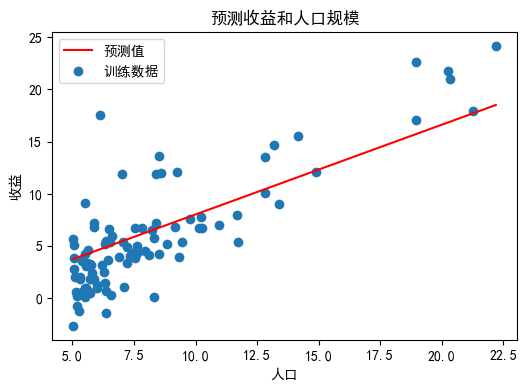

In [902]:
x = np.linspace(X_data['人口'].min(), X_data['人口'].max(), 100)
f = W[0, 0] + (W[1, 0] * x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, f, 'r', label='预测值')
ax.scatter(X_data['人口'], data['收益'], label='训练数据')
ax.legend(loc=2)
ax.set_xlabel('人口' )
ax.set_ylabel('收益', rotation=90)
ax.set_title('预测收益和人口规模')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

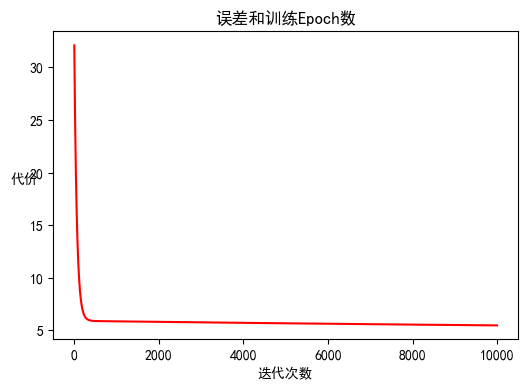

In [903]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(iters), loss_his, 'r')
ax.set_xlabel('迭代次数')
ax.set_ylabel('代价', rotation=0)
ax.set_title('误差和训练Epoch数')
plt.show()

为了引入L2范数正则项，并观察回归效果的变化，我们需要在损失函数中添加正则化项，并相应地修改梯度下降的更新规则。

计算带有正则化项的损失函数：
原始的损失函数是平方损失函数，现在我们需要在其基础上加上L2范数正则项。这样的损失函数表示了模型的预测误差和参数的大小。
L2范数正则项的目的是惩罚模型参数的绝对值大小，防止模型过拟合。
$$J(W) = \frac{1}{2m} \sum_{i=1}^{m} (f(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} W_j^2$$
其中，λ 是正则化参数，用来控制正则项对损失的影响程度。

In [904]:
# 定义带有正则化项的损失函数
def computeCost_with_regularization(X, Y, W, lambda_reg):
    m = X.shape[0]
    Y_hat = np.dot(X, W)
    loss = np.sum((Y_hat - Y) ** 2) / (2 * m) + lambda_reg * np.sum(W ** 2) / (2 * m)  # 添加L2范数正则项
    return loss

使用带有正则化项的梯度下降法：
在更新模型参数时，我们需要考虑正则项对梯度的影响，因此需要相应调整梯度的计算方法。
梯度下降法的更新规则变为：$$W := W - \alpha \frac{1}{m} (X^T (f(X) - Y) + \lambda W)$$
其中，α 是学习率，λ 是正则化参数，m 是样本数量。

In [905]:
# 定义带有正则化项的梯度下降法
def gradientDescent_with_regularization(X, Y, W, alpha, lambda_reg):
    m = X.shape[0]
    Y_hat = np.dot(X, W)
    dW = (np.dot(X.T, (Y_hat - Y)) + lambda_reg * W) / m  # 加上正则项的梯度更新规则
    W -= alpha * dW
    return W

线性回归模型的训练：
修改了损失函数和梯度下降更新规则后，我们需要重新训练模型。
这一步与原始线性回归模型的训练过程相似，只不过调用的是带有正则化项的损失函数和梯度下降法。

观察回归效果和损失的变化：
在模型训练完成后，我们可以使用训练好的模型参数进行预测，并观察模型对测试数据的拟合效果。
同时，我们还可以绘制损失随着训练迭代次数的变化曲线，以观察模型的收敛情况和损失的变化趋势。


In [906]:
# 定义线性回归模型的训练函数
def linearRegression_with_regularization(X, Y, alpha, lambda_reg, iters):
    loss_his = []
    feature_dim = X.shape[1]
    W = np.zeros((feature_dim, 1))
    for i in range(iters):
        loss = computeCost_with_regularization(X, Y, W, lambda_reg)
        loss_his.append(loss)
        W = gradientDescent_with_regularization(X, Y, W, alpha, lambda_reg)
    return loss_his, W

通过以上步骤，我们可以实现带有L2范数正则化项的线性回归模型，并观察正则化对模型性能的影响。

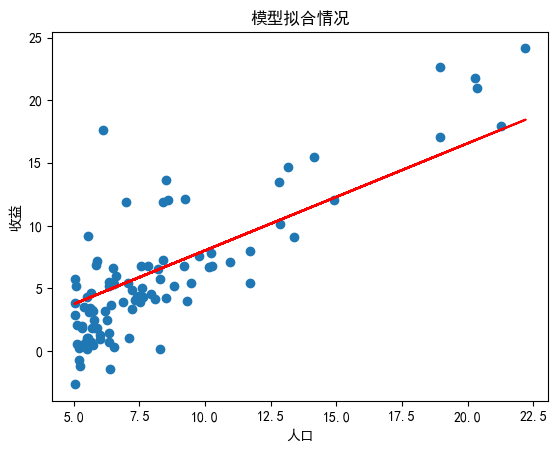

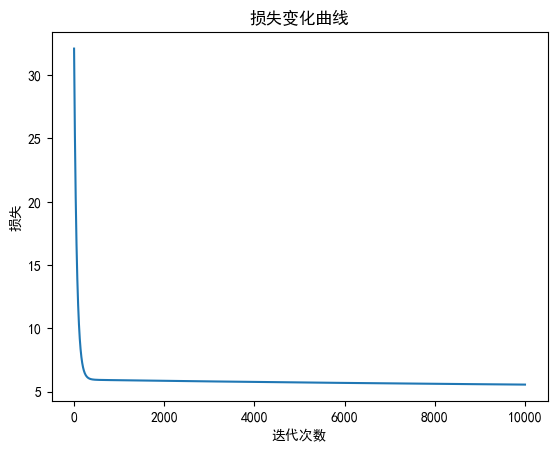

In [907]:
# 调用函数并进行训练
alpha = 0.0001
lambda_reg = 10  # 增大正则化参数的值
iters = 10000
loss_his, W = linearRegression_with_regularization(X, Y, alpha, lambda_reg, iters)

# 绘制模型拟合曲线
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], np.dot(X, W), 'r')
plt.xlabel('人口')
plt.ylabel('收益')
plt.title('模型拟合情况')
plt.show()

# 绘制损失曲线
plt.plot(range(iters), loss_his)
plt.xlabel('迭代次数')
plt.ylabel('损失')
plt.title('损失变化曲线')
plt.show()

从数据集中读取特征属性X和目标变量Y。
假设X和Y是预先定义好的特征属性和目标变量

使用最小二乘法求解参数：
利用最小二乘法的公式直接求解参数W，公式为：$$ W = (X^T X)^{-1} X^T Y $$
其中，$$X^T$$表示x的转置
$$ Y_{\text{pred}} = X \cdot W $$

In [908]:
import numpy as np
import matplotlib.pyplot as plt
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

进行预测：
使用求解得到的参数W进行预测，得到模型的预测值。

In [909]:
Y_pred = X.dot(W)

绘制模型拟合曲线：
绘制模型的预测曲线和真实数据的散点图，以直观展示模型的拟合效果。

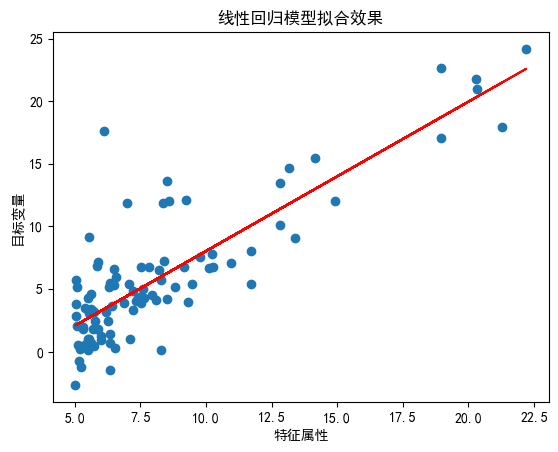

In [910]:
plt.scatter(X[:, 1], Y)  # 绘制真实数据的散点图
plt.plot(X[:, 1], Y_pred, 'r')  # 绘制模型的预测曲线
plt.xlabel('特征属性')  # 设置x轴标签
plt.ylabel('目标变量')  # 设置y轴标签
plt.title('线性回归模型拟合效果')  # 设置标题
plt.show()  # 显示图形

数据归一化：
对特征属性X进行数据归一化，将每个特征的数值范围映射到0到1之间。

In [911]:
def normalize_features(X):
    X_normalized = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    return X_normalized

X_normalized = normalize_features(X)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3224\2836575475.py:2: RuntimeWarning: invalid value encountered in divide
  X_normalized = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))


使用最小二乘法求解参数：
利用最小二乘法的公式直接求解参数W，公式为：$$ W = (X^T X)^{-1} X^T Y $$

In [912]:
W = np.linalg.inv(X_normalized.T.dot(X_normalized)).dot(X_normalized.T).dot(Y)

进行预测：
使用求解得到的参数W进行预测，得到模型的预测值。

In [913]:
# 进行预测
Y_pred_normalized = X_normalized.dot(W)
# 将预测结果映射回原始数据空间
Y_pred = Y_pred_normalized * (np.max(Y) - np.min(Y)) + np.min(Y)

绘制模型拟合曲线：
绘制模型的预测曲线和真实数据的散点图，以直观展示模型的拟合效果。

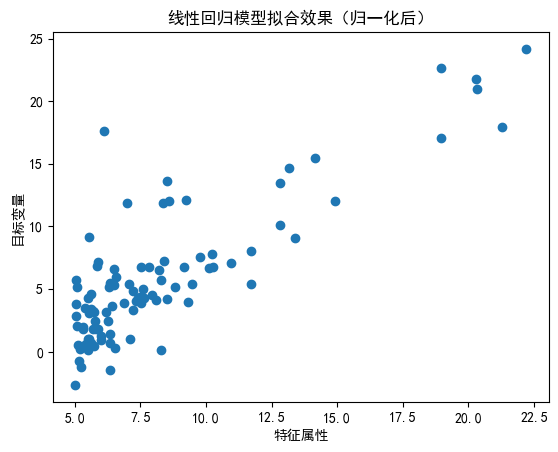

In [914]:
plt.scatter(X[:, 1], Y)  # 绘制真实数据的散点图
plt.plot(X[:, 1], Y_pred, 'r')  # 绘制模型的预测曲线
plt.xlabel('特征属性')  # 设置x轴标签
plt.ylabel('目标变量')  # 设置y轴标签
plt.title('线性回归模型拟合效果（归一化后）')  # 设置标题
plt.show()  # 显示图形

最小二乘法求解参数：
定义一个函数least_squares(X, Y)，用于使用最小二乘法求解参数W。

In [915]:
def least_squares(X, Y):
    W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return W

计算损失函数：
定义一个函数compute_loss(X, Y, W)，用于计算损失函数的值。这里我们使用的是均方误差损失函数。

In [916]:
def compute_loss(X, Y, W):
    m = X.shape[0]
    Y_hat = X.dot(W)
    loss = np.sum((Y_hat - Y) ** 2) / (2 * m)
    return loss

线性回归模型函数：
定义一个函数linear_regression(X_train, Y_train, X_test, Y_test, alpha, num_iterations)，用于训练线性回归模型并获取训练和测试损失。在函数内部，先进行数据归一化，然后使用最小二乘法求解参数，接着进行训练迭代，计算训练集和测试集的损失，并记录到损失列表中。

In [917]:
def linear_regression(X_train, Y_train, X_test, Y_test, alpha, num_iterations):
    # 归一化训练集和测试集特征属性
    X_train_normalized = normalize_features(X_train)
    X_test_normalized = normalize_features(X_test)
    
    # 使用最小二乘法求解参数
    W = least_squares(X_train_normalized, Y_train)
    
    # 初始化训练集和测试集的损失列表
    train_losses = []
    test_losses = []
    
    # 进行训练迭代
    for i in range(num_iterations):
        # 计算训练集和测试集的损失
        train_loss = compute_loss(X_train_normalized, Y_train, W)
        test_loss = compute_loss(X_test_normalized, Y_test, W)
        
        # 将损失记录到损失列表中
        train_losses.append(train_loss)
        test_losses.append(test_loss)
              
    return train_losses, test_losses

创建一些随机的训练集和测试集数据：

In [918]:
# 生成示例数据
np.random.seed(0)  # 设置随机种子以确保结果可重复

# 定义训练集大小
m_train = 100

# 创建训练集特征属性 X_train，假设有两个特征
X_train = 2 * np.random.rand(m_train, 2)

# 创建训练集目标变量 Y_train，假设为线性关系加上一些随机噪声
Y_train = 4 + 3 * X_train[:, 0:1] + 2 * X_train[:, 1:2] + np.random.randn(m_train, 1)

# 定义测试集大小
m_test = 20

# 创建测试集特征属性 X_test，假设与训练集类似
X_test = 2 * np.random.rand(m_test, 2)

# 创建测试集目标变量 Y_test，假设与训练集类似
Y_test = 4 + 3 * X_test[:, 0:1] + 2 * X_test[:, 1:2] + np.random.randn(m_test, 1)

调用线性回归模型函数：
调用线性回归模型函数进行模型训练，并获取训练和测试损失。

In [919]:
# 假设alpha是学习率，num_iterations是迭代次数
alpha = 0.01
num_iterations = 1000

# 训练线性回归模型并获取训练和测试损失
train_losses, test_losses = linear_regression(X_train, Y_train, X_test, Y_test, alpha, num_iterations)

绘制训练和测试损失曲线：
使用Matplotlib库绘制训练和测试损失曲线，以直观观察损失的变化情况。

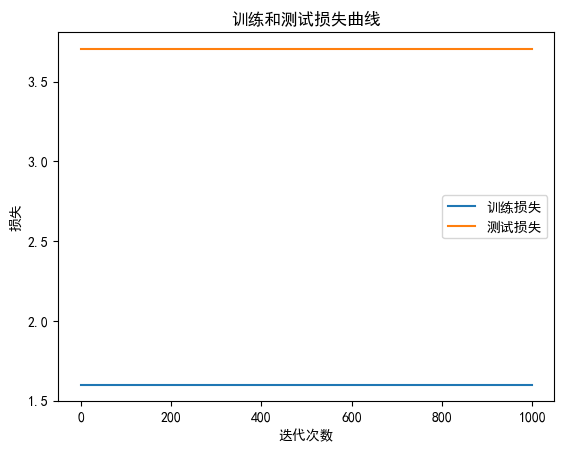

In [920]:
plt.plot(range(num_iterations), train_losses, label='训练损失')
plt.plot(range(num_iterations), test_losses, label='测试损失')
plt.xlabel('迭代次数')
plt.ylabel('损失')
plt.title('训练和测试损失曲线')
plt.legend()
plt.show()